#### **Phase I**

#### 1. Problem & Target

#### features說明
* sepal length(花萼長度)
* sepal width(花萼寬度)
* petal length(花瓣長度)
* petal width(花瓣寬度)
* class: 鳶尾花類別，包括山鳶尾（setosa）、變色鳶尾（verscicolor）和維吉尼亞鳶尾（virginica）三種

#### 2. dataset

In [77]:
## load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from my_template import added_section_separate_line, describe_skew_unvariate_distribution, describe_class_distribution
from my_template import visualize_features_hist, visualize_density_plot, visualize_box_whisker_plot, visualize_correlation_matrix
from my_template import remove_duplicate_rows, detect_column_only_single_value, detect_have_null_value
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [58]:
## load dataset
filename = './dataset/iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(filename, names=names)

In [59]:
## summarize data
print(f"dataset head: \n{df.head()}")
added_section_separate_line()
print(f"dataset shape: {df.shape}")
added_section_separate_line()
pd.set_option('precision', 1)
print(f"dataset description: \n{df.describe()}")
added_section_separate_line()
print("feaures skew:")
describe_skew_unvariate_distribution(df, df.columns)
added_section_separate_line()
print("target class distribution:")
describe_class_distribution(df, 'class')

dataset head: 
   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
------------------------------
dataset shape: (150, 5)
------------------------------
dataset description: 
       sepal-length  sepal-width  petal-length  petal-width
count         150.0        150.0         150.0        150.0
mean            5.8          3.1           3.8          1.2
std             0.8          0.4           1.8          0.8
min             4.3          2.0           1.0          0.1
25%             5.1          2.8           1.6          0.3
50%             5.8          3.0           4.3          1.3
75%             6.4          3.3           

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

Histogram of features:


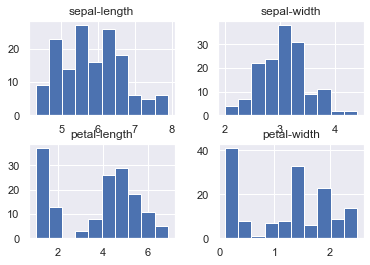

------------------------------
Density Plots of features:


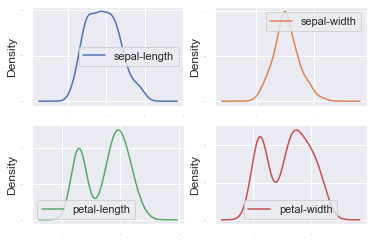

------------------------------
Box-whisker Plots of features:


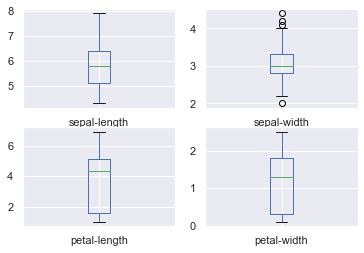

In [60]:
## data visualization
sns.set_theme(style="darkgrid")
visualize_features_hist(df, df.columns)
added_section_separate_line()
visualize_density_plot(df, df.columns, layout=(2,2))
added_section_separate_line()
visualize_box_whisker_plot(df, df.columns, layout=(2,2))

#### **Phase II** (Round 0)

#### 3. data preprocessing

In [61]:
## data cleaning - remove duplicate
print(f"Origin shape: {df.shape}")
remove_duplicate_rows(df)
print(f"New shape: {df.shape}")

Origin shape: (150, 5)
     sepal-length  sepal-width  petal-length  petal-width           class
34            4.9          3.1           1.5          0.1     Iris-setosa
37            4.9          3.1           1.5          0.1     Iris-setosa
142           5.8          2.7           5.1          1.9  Iris-virginica
--------------------
Before duplicate removed: (150, 5)
After duplicate removed: (147, 5)
New shape: (147, 5)


* 觀察有3條duplicate data，予以刪除

In [62]:
## data cleaning - data detection to remove
detect_column_only_single_value(df)
added_section_separate_line()
detect_have_null_value(df)

Record columns to delete (only single value): []
------------------------------
There is no null value in dataframe.


* 無null value，不須刪除

#### 4. model & validation

In [63]:
seed = 87
scoring = "accuracy"   # 使用accuracy評估model

In [64]:
data = df.values
X = data[:, :4]
y = data[:, 4]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
print(f"Input: {X_train.shape}")
print(X_train[:5, :])
print(f"Output: {y_train.shape}")
print(y_train[:5])

Input: (117, 4)
[[4.7 3.2 1.6 0.2]
 [6.4 2.8 5.6 2.2]
 [5.0 2.3 3.3 1.0]
 [6.0 2.9 4.5 1.5]
 [5.0 3.4 1.6 0.4]]
Output: (117,)
['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-setosa']


In [65]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear', multi_class='ovr'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

>LR 0.969 (0.051)
>LDA 1.000 (0.000)
>KNN 0.972 (0.050)
>CART 0.955 (0.068)
>RF 0.969 (0.046)
>GBM 0.969 (0.055)
>NB 0.971 (0.040)
>SVM 0.977 (0.043)


* 小結：
    * 雖然看起來LDA的accuracy最佳，但100%有機率會是overfitting，所以先挑選前幾大model作為後續確認：LDA、SVM、KNN

#### **Phase III** (Round 0)

#### 5. prediction

In [66]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
added_section_separate_line()
print(f"confusion matric: \n{confusion_matrix(y_test, y_pred)}")
added_section_separate_line()
print(f"classification report: \n{classification_report(y_test, y_pred)}")

accuracy score: 90.000%
------------------------------
confusion matric: 
[[14  0  0]
 [ 0  7  2]
 [ 0  1  6]]
------------------------------
classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.88      0.78      0.82         9
 Iris-virginica       0.75      0.86      0.80         7

       accuracy                           0.90        30
      macro avg       0.88      0.88      0.87        30
   weighted avg       0.90      0.90      0.90        30



In [67]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
added_section_separate_line()
print(f"confusion matric: \n{confusion_matrix(y_test, y_pred)}")
added_section_separate_line()
print(f"classification report: \n{classification_report(y_test, y_pred)}")

accuracy score: 93.333%
------------------------------
confusion matric: 
[[14  0  0]
 [ 0  7  2]
 [ 0  0  7]]
------------------------------
classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30



In [68]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
added_section_separate_line()
print(f"confusion matric: \n{confusion_matrix(y_test, y_pred)}")
added_section_separate_line()
print(f"classification report: \n{classification_report(y_test, y_pred)}")

accuracy score: 93.333%
------------------------------
confusion matric: 
[[14  0  0]
 [ 0  7  2]
 [ 0  0  7]]
------------------------------
classification report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.78      1.00      0.88         7

       accuracy                           0.93        30
      macro avg       0.93      0.93      0.92        30
   weighted avg       0.95      0.93      0.93        30



* 小結：
    * 比較LDA、SVC與KNN在預測後的確認，雖然LDA在模型訓練後驗證有最佳的accuracy(100%)，但預測後與測試集的差異卻比SVC與KNN高，有很大程度是出現overfitting
    * 此ROUND沒有對feature做任何處理，後續對feature做處理後再次確認是否可避免掉overfitting等現象
    * 或許在多元分類模型訓練後的驗證指標不能完全使用accuracy來做評估，需考慮其他評價指標

#### **Phase II** (Round 1: 針對feature做相關性比較)

In [69]:
seed = 87
scoring = "accuracy"   # 使用accuracy評估model

   sepal-length  sepal-width  petal-length  petal-width        class  class_no
0           5.1          3.5           1.4          0.2  Iris-setosa         0
1           4.9          3.0           1.4          0.2  Iris-setosa         0
2           4.7          3.2           1.3          0.2  Iris-setosa         0
3           4.6          3.1           1.5          0.2  Iris-setosa         0
4           5.0          3.6           1.4          0.2  Iris-setosa         0
Correlation matrix of features:


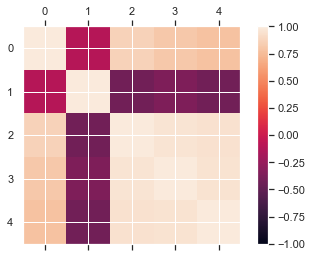

In [70]:
new_df = df
di = {"Iris-setosa": 0, "Iris-versicolor": 1, "Iris-virginica": 2}
new_df['class_no'] = new_df['class'].replace(di, inplace=False)
print(new_df.head())
describe_class_distribution(new_df, 'class_no')
visualize_correlation_matrix(new_df, ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class_no'])

* 觀察相關性，發現'sepal-width'與其他features出現相關性較小或偏負相關，可以從這個地方著手來進行feature selection

In [71]:
# 去除sepal-width
new_df = df[['sepal-length', 'petal-length', 'petal-width', 'class']]
data = new_df.values
X = data[:, :-1]
y = data[:, -1]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
print(f"Input: {X_train.shape}")
print(X_train[:5, :])
print(f"Output: {y_train.shape}")
print(y_train[:5])

Input: (117, 3)
[[4.7 1.6 0.2]
 [6.4 5.6 2.2]
 [5.0 3.3 1.0]
 [6.0 4.5 1.5]
 [5.0 1.6 0.4]]
Output: (117,)
[0 2 1 1 0]


In [72]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear', multi_class='ovr'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

>LR 0.952 (0.056)
>LDA 0.991 (0.026)
>KNN 0.974 (0.045)
>CART 0.958 (0.057)
>RF 0.969 (0.046)
>GBM 0.969 (0.055)
>NB 0.974 (0.039)
>SVM 0.983 (0.034)


#### **Phase III** (Round 1:針對feature做相關性比較)

#### 5. Prediction

In [73]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
added_section_separate_line()
print(f"confusion matric: \n{confusion_matrix(y_test, y_pred)}")
added_section_separate_line()
print(f"classification report: \n{classification_report(y_test, y_pred)}")

accuracy score: 90.000%
------------------------------
confusion matric: 
[[14  0  0]
 [ 0  7  2]
 [ 0  1  6]]
------------------------------
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      0.78      0.82         9
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.88      0.88      0.87        30
weighted avg       0.90      0.90      0.90        30



In [74]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
added_section_separate_line()
print(f"confusion matric: \n{confusion_matrix(y_test, y_pred)}")
added_section_separate_line()
print(f"classification report: \n{classification_report(y_test, y_pred)}")

accuracy score: 93.333%
------------------------------
confusion matric: 
[[14  0  0]
 [ 0  7  2]
 [ 0  0  7]]
------------------------------
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.78      0.88         9
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.92        30
weighted avg       0.95      0.93      0.93        30



* 小結：
    * 移除feature "sepal-width"後發現普遍訓練accuracy下降，但預測能力並無下降，LDA的預測能力反而微幅提升，證明前面確實有出現overfitting的問題

#### **Phase II** (Round 2: 考量不刪除duplicate + 使用KFold取代RepeatedStratifiedKFold做驗證)

In [86]:
## load dataset
filename = './dataset/iris.data.csv'
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
df = pd.read_csv(filename, names=names)
# prepare dataset
data = df.values
X = data[:, :-1]
y = data[:, -1]
validation_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=validation_size, random_state=seed)
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)
print(f"Input: {X_train.shape}")
print(X_train[:5, :])
print(f"Output: {y_train.shape}")
print(y_train[:5])

Input: (120, 4)
[[5.1 3.7 1.5 0.4]
 [5.5 2.3 4.0 1.3]
 [4.8 3.0 1.4 0.3]
 [6.7 3.3 5.7 2.5]
 [5.0 2.3 3.3 1.0]]
Output: (120,)
[0 1 0 2 1]


In [87]:
# build model
models = dict()
models['LR'] = Pipeline(steps=[('m', LogisticRegression(solver='liblinear', multi_class='ovr'))])
models['LDA'] = Pipeline(steps=[('m', LinearDiscriminantAnalysis())])
models['KNN'] = Pipeline(steps=[('m', KNeighborsClassifier())])
models['CART'] = Pipeline(steps=[('m', DecisionTreeClassifier())])
models['RF'] = Pipeline(steps=[('m', RandomForestClassifier())])
models['GBM'] = Pipeline(steps=[('m', GradientBoostingClassifier())])
models['NB'] = Pipeline(steps=[('m', GaussianNB())])
models['SVM'] = Pipeline(steps=[('m', SVC(gamma='auto'))])
# train model
results, names = list(), list()
for name, model in models.items():
    cv = KFold(n_splits=10, random_state=seed, shuffle=True)
    # cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=seed)
    scores = cross_val_score(model, X_train, y_train, scoring=scoring, cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(f">{name} {np.mean(scores):.3f} ({np.std(scores):.3f})")

>LR 0.958 (0.056)
>LDA 0.975 (0.038)
>KNN 0.967 (0.041)
>CART 0.958 (0.056)
>RF 0.958 (0.042)
>GBM 0.967 (0.041)
>NB 0.942 (0.053)
>SVM 0.992 (0.025)


* 取用驗證最佳accuracy模型SVC

#### **Phase III** (Round 2: 考量不刪除duplicate + 使用KFold取代RepeatedStratifiedKFold做驗證)

In [88]:
model = SVC(gamma='auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(f"accuracy score: {100*accuracy_score(y_test, y_pred):.3f}%")
added_section_separate_line()
print(f"confusion matric: \n{confusion_matrix(y_test, y_pred)}")
added_section_separate_line()
print(f"classification report: \n{classification_report(y_test, y_pred)}")

accuracy score: 96.667%
------------------------------
confusion matric: 
[[13  0  0]
 [ 0  8  1]
 [ 0  0  8]]
------------------------------
classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.89      0.94         9
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



* 結論：
    * 比較不同dataset處理方式、feature處理方式，以及模型驗證方式後發現事實與直觀的處理方式有落差
    * 例如此dataset在不刪除duplicate時反而結果較好
    * 例如使用KFold與RepeatedStratifiedKFold作驗證時也有所差異
    * 後續可持續驗證包括seed設定對dataset影響性多大(使用不同train與test)、KFold與RepeatedStratifiedKFold在細節上的差異回推原因，以及何時需移除duplicate?何時不需要?